In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
matches=pd.read_csv("C:/Users/T DIVYAJA REDDY/Desktop/matches.csv")
matches.head(5)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2008_1,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2008_2,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,2008_3,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,2008_4,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,2008_5,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [3]:
print(matches.columns.values)

['match_id' 'season' 'city' 'date' 'team1' 'team2' 'toss_winner'
 'toss_decision' 'result' 'dl_applied' 'winner' 'win_by_runs'
 'win_by_wickets' 'player_of_match' 'venue' 'umpire1' 'umpire2']


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
match_id           756 non-null object
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            755 non-null object
umpire2            755 non-null object
dtypes: int64(4), object(13)
memory usage: 100.5+ KB


In [5]:
matches[pd.isnull(matches['winner'])]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
241,2011_67,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
486,2015_29,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
511,2015_54,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,2019_49,2019,Bangalore,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [6]:
matches['winner'].fillna('Draw', inplace=True)

In [7]:
matches[pd.isnull(matches['winner'])]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [8]:
#here we are replacing the name with shortnames...
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore',
'Deccan Chargers','Chennai Super Kings',
'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXI','SRH','RPS','RPS','KTK','PW'],inplace=True)
#here we are encoding that short name to numbers...
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXI':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXI':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXI':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXI':9,
'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2008_1,2008,Bangalore,18-04-2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2008_2,2008,Chandigarh,19-04-2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri


In [9]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
402,2014_5,2014,NaN,19-04-2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
403,2014_6,2014,NaN,19-04-2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
407,2014_10,2014,NaN,23-04-2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
409,2014_12,2014,NaN,25-04-2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
410,2014_13,2014,NaN,25-04-2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
415,2014_18,2014,NaN,28-04-2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
417,2014_20,2014,NaN,30-04-2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [10]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null inthat case we will fill it with dubai
matches['city'].fillna('Dubai',inplace=True)

In [11]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [12]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


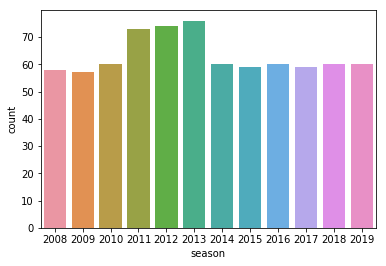

In [13]:
sns.countplot(x='season', data=matches)
plt.show()

Text(0.5, 1.0, 'Demanding cities')

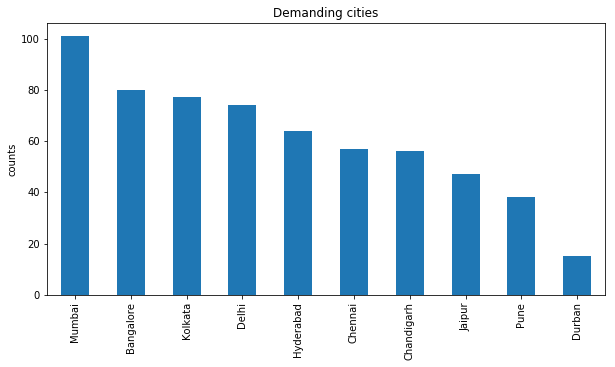

In [14]:
plt.figure(figsize=(10,5))
matches.city.value_counts().head(10).plot(kind='bar')
plt.ylabel('counts')
plt.title('Demanding cities')

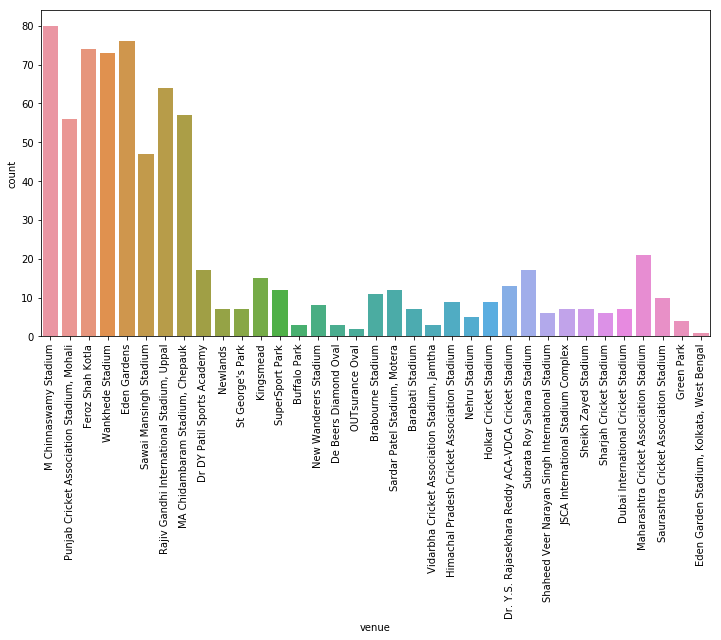

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation='vertical')
plt.show()

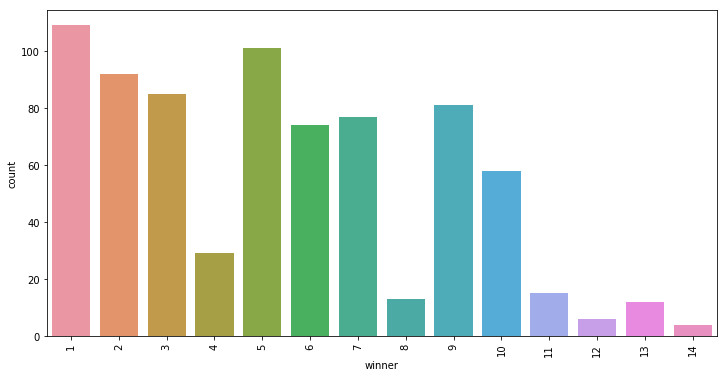

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
dicVal = encode['team1']
dicVal

{'MI': 1,
 'KKR': 2,
 'RCB': 3,
 'DC': 4,
 'CSK': 5,
 'RR': 6,
 'DD': 7,
 'GL': 8,
 'KXI': 9,
 'SRH': 10,
 'RPS': 11,
 'KTK': 12,
 'PW': 13}

In [18]:
matches.player_of_match.value_counts().head()

CH Gayle          18
DA Warner         17
YK Pathan         16
MS Dhoni          16
AB de Villiers    16
Name: player_of_match, dtype: int64

In [19]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(6)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,7,Delhi,bat,6,Feroz Shah Kotla,7
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2
5,9,6,Jaipur,bat,9,Sawai Mansingh Stadium,6


In [20]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000
mean,5.507937,5.511905,5.361111,5.309524
std,3.307017,3.274807,3.217999,3.263195
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.000000,7.250000
max,13.000000,13.000000,13.000000,14.000000


In [21]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
     df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [22]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy of the model is : %s' % '{0:.3%}'.format(accuracy))
    kf = KFold(n_splits=5)
    kf.get_n_splits()
    error = []
    for train, test in kf.split(data[predictors]):
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    model.fit(data[predictors],data[outcome])

In [23]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,15,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,9,7


In [24]:
model = RandomForestClassifier()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

Accuracy of the model is : 85.185%


C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [25]:
from sklearn import svm
model = svm.SVC()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of the model is : 75.265%


C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\T DIVYAJA REDDY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change f

In [26]:
for i, item in enumerate(le.classes_):
    print(item, "-->", i)

Barabati Stadium --> 0
Brabourne Stadium --> 1
Buffalo Park --> 2
De Beers Diamond Oval --> 3
Dr DY Patil Sports Academy --> 4
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium --> 5
Dubai International Cricket Stadium --> 6
Eden Garden Stadium, Kolkata, West Bengal --> 7
Eden Gardens --> 8
Feroz Shah Kotla --> 9
Green Park --> 10
Himachal Pradesh Cricket Association Stadium --> 11
Holkar Cricket Stadium --> 12
JSCA International Stadium Complex --> 13
Kingsmead --> 14
M Chinnaswamy Stadium --> 15
MA Chidambaram Stadium, Chepauk --> 16
Maharashtra Cricket Association Stadium --> 17
Nehru Stadium --> 18
New Wanderers Stadium --> 19
Newlands --> 20
OUTsurance Oval --> 21
Punjab Cricket Association Stadium, Mohali --> 22
Rajiv Gandhi International Stadium, Uppal --> 23
Sardar Patel Stadium, Motera --> 24
Saurashtra Cricket Association Stadium --> 25
Sawai Mansingh Stadium --> 26
Shaheed Veer Narayan Singh International Stadium --> 27
Sharjah Cricket Stadium --> 28
Sheikh Zayed Stadium -

In [27]:
#enter team1,team2,venue,toss_winner,city,toss_decision
#CSK VS MI at Chipauk Stadium,Chennai:toss won by CSK and elected to field
team1='MI'
team2='CSK'
toss_winner='CSK'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'16','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

MI


In [36]:
team1='SRH'
team2='MI'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'16','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

SRH
